<h1 style="color:orange">QDA Exam - Gen 2024</h1> 
Francesco Marco Riboli - 10502512 - 8CFU

# Exercise 2

An oil & gas company has implemented a new quality assurance protocol to keep under control their welding 
operations. During a laser welding process, four critical quality characteristics are monitored. The data 
collected with the process in its regime condition are stored in `PCA_phase1.csv`. The time order of the data 
corresponds to the actual time order of process execution and data collection. The head of the quality 
department is interested in designing and testing a control chart based on Principal Component Analysis.

In [38]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import qda
from statsmodels.tsa.arima.model import ARIMA
import itertools
import statsmodels.graphics.tsaplots as sgt
from statsmodels.sandbox.stats.runs import runstest_1samp
from sklearn.decomposition import PCA

In [39]:

# Import the dataset
phase1_data = pd.read_csv('PCA_phase1.csv')

# Inspect the dataset
phase1_data.head()

,X1,X2,X3,X4
0,2.364865,50.892173,0.448706,5.294118
1,3.783784,50.417180,0.445275,3.411765
2,-0.067568,51.678975,0.072837,5.807487
3,2.500000,52.098773,0.505743,4.096257
4,2.229730,48.623834,0.184664,3.197861


In [40]:
phase1_data.describe()

,X1,X2,X3,X4
count,40.000000,40.000000,40.000000,40.000000
mean,2.540541,51.006049,0.270290,3.916578
std,2.056542,2.615177,0.163467,1.462852
min,-0.675676,46.858086,-0.041946,1.358289
25%,1.385135,48.798377,0.179374,3.069519
50%,2.398649,50.862640,0.295650,3.796791
75%,3.243243,52.636678,0.378627,4.278075
max,12.702703,57.432997,0.597609,10.085562


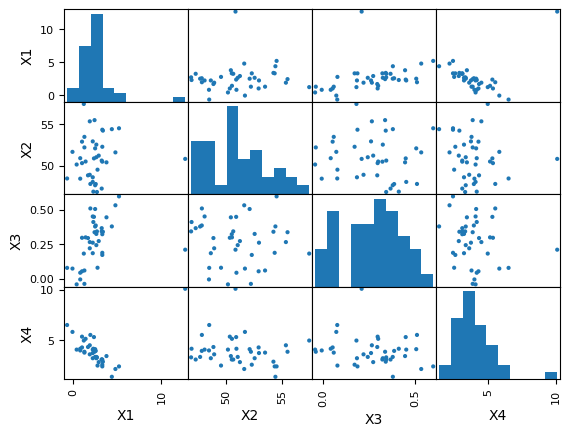

In [41]:
# Create a correlation plot of the dataset
pd.plotting.scatter_matrix(phase1_data, alpha = 1)
plt.show()

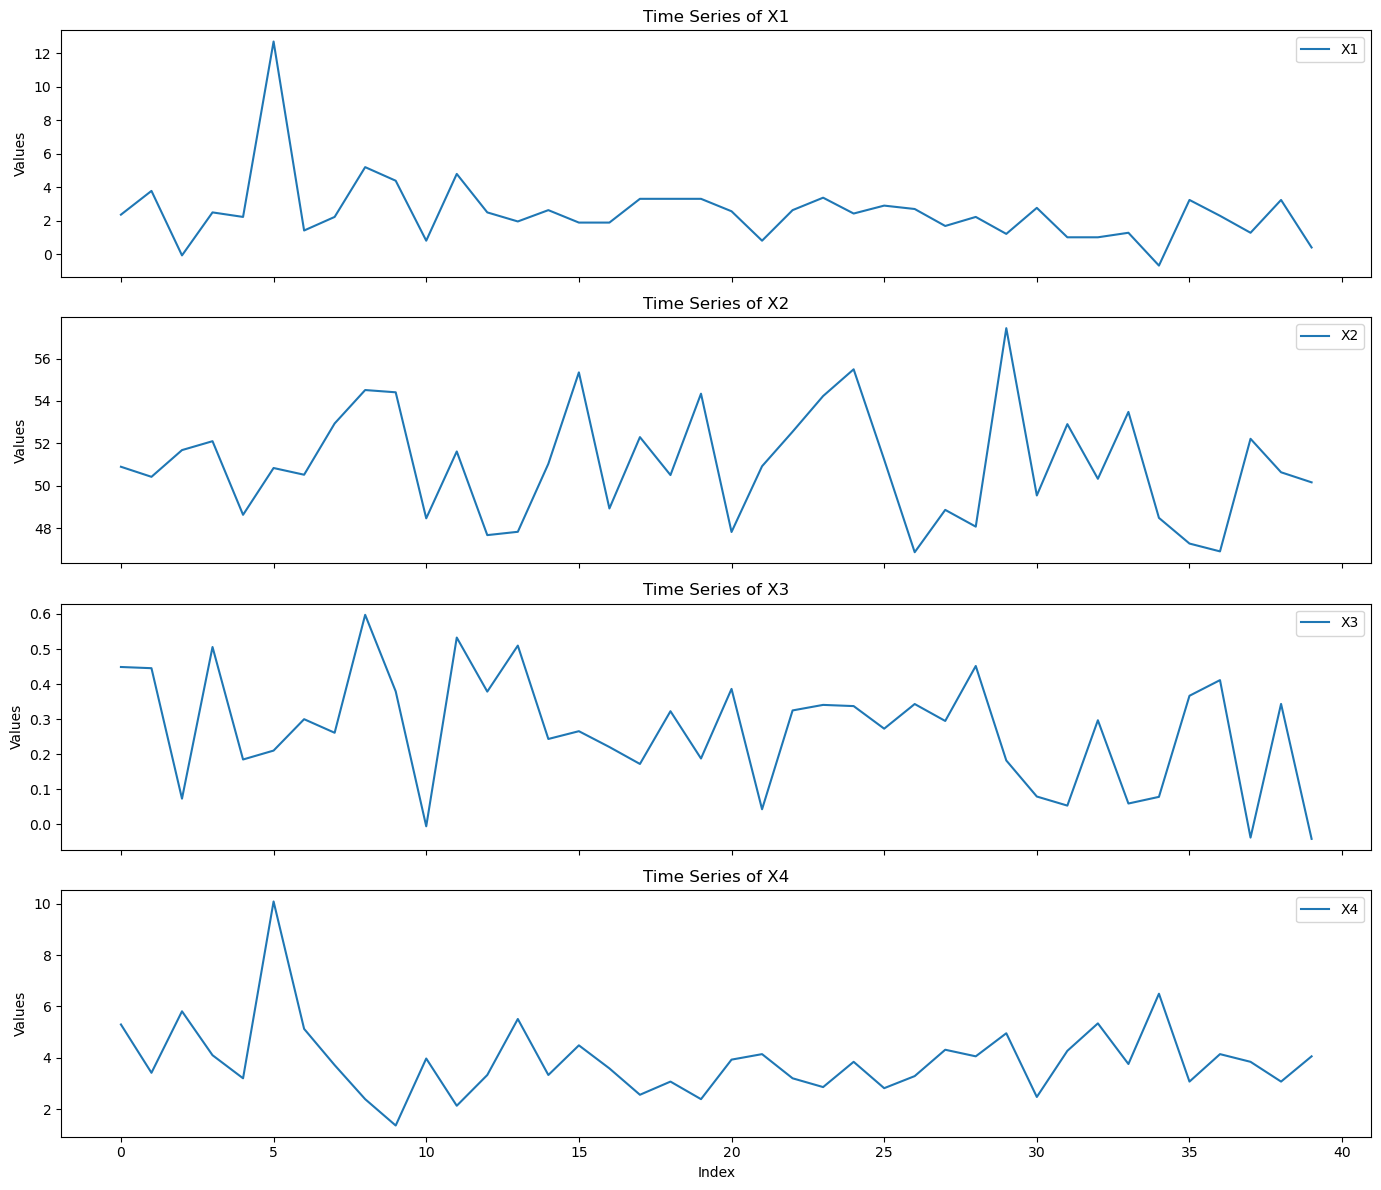

In [42]:
# Plot time series of each Xi variable on separate subplots within the same figure
fig, axs = plt.subplots(4, 1, figsize=(14, 12), sharex=True)

for i, column in enumerate(phase1_data.columns):
    axs[i].plot(phase1_data.index, phase1_data[column], label=column)
    axs[i].set_title(f'Time Series of {column}')
    axs[i].set_ylabel('Values')
    axs[i].legend()

axs[-1].set_xlabel('Index')
plt.tight_layout()
plt.show()

## a) For these data, is it more appropriate to apply the PCA using the variance-covariance matrix of the data or their correlation matrix? Motivate your answer. 

In [43]:
# Create the variance covariance matrix using pandas
cov_matrix = phase1_data.cov()
print(cov_matrix)

          X1        X2        X3        X4
X1  4.229364  0.482745  0.122745  0.583292
X2  0.482745  6.839151 -0.034843 -0.519913
X3  0.122745 -0.034843  0.026722 -0.045486
X4  0.583292 -0.519913 -0.045486  2.139936


The  variables  have  quite  different marginal  variances.  Thus, it is  more  appropriate  to estimate  the  PCA  by 
using the correlation matrix of the original data, which is equivalent to standardize the data and estimate the 
PCA for the standardized variables. 

In [44]:
# Create the correlation matrix using pandas
corr_matrix = phase1_data.corr()
print(corr_matrix)

          X1        X2        X3        X4
X1  1.000000  0.089759  0.365119  0.193887
X2  0.089759  1.000000 -0.081506 -0.135903
X3  0.365119 -0.081506  1.000000 -0.190214
X4  0.193887 -0.135903 -0.190214  1.000000


## b) Based on the outcome of point 1, apply PCA to the available data and determine the number of principal components that should be retained to capture at least 60% of the total variance (report the eigenvectors and the eigenvalues of the retained components). Discuss the results trying to interpret the retained PCs. 

In [45]:
# Standardize the data by subtracting the mean and dividing by the standard deviation
phase1_data_std = (phase1_data - phase1_data.mean()) / phase1_data.std()

phase1_data_std.describe()

,X1,X2,X3,X4
count,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01
mean,5.551115e-16,1.632028e-15,-1.387779e-16,2.910866e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.563895e+00,-1.586112e+00,-1.910076e+00,-1.748836e+00
25%,-5.618195e-01,-8.441765e-01,-5.561666e-01,-5.790461e-01
50%,-6.899538e-02,-5.483712e-02,1.551385e-01,-8.188531e-02
75%,3.416914e-01,6.235256e-01,6.627436e-01,2.471182e-01
max,4.941384e+00,2.457558e+00,2.002350e+00,4.217094e+00


In [46]:
# Apply the PCA on the correlation matrix instead of the covariance matrix
pca_corr = PCA()
pca_corr.fit(phase1_data_std) 
# Compare the eigenvalues
#print("Eigenvalues from ORIGINAL data \n", pca.explained_variance_)
print("Eigenvalues from STANDARDIZED data \n", pca_corr.explained_variance_)
# Compare the eigenvectors
#print("\nEigenvectors from ORIGINAL data \n", pca.components_)
print("Eigenvectors from STANDARDIZED data \n", pca_corr.components_)
# Compare the explained variance ratio
#print("\nExplained variance ratio from ORIGINAL data \n", pca.explained_variance_ratio_)
print("Explained variance ratio from STANDARDIZED data \n", pca_corr.explained_variance_ratio_)
# Compare the cumulative explained variance ratio
#print("\nCumulative explained variance ratio from ORIGINAL data \n", np.cumsum(pca.explained_variance_ratio_))
print("Cumulative explained variance ratio from STANDARDIZED data \n", np.cumsum(pca_corr.explained_variance_ratio_))

Eigenvalues from STANDARDIZED data 
 [1.36522208 1.1747351  1.02226536 0.43777745]
Eigenvectors from STANDARDIZED data 
 [[ 0.71001208  0.01574508  0.70399962  0.00441176]
 [ 0.23292303 -0.42788978 -0.23062091  0.84230113]
 [ 0.3059173   0.85478789 -0.32927355  0.25948255]
 [ 0.5899528  -0.29325773 -0.58547199 -0.47241734]]
Explained variance ratio from STANDARDIZED data 
 [0.34130552 0.29368378 0.25556634 0.10944436]
Cumulative explained variance ratio from STANDARDIZED data 
 [0.34130552 0.6349893  0.89055564 1.        ]


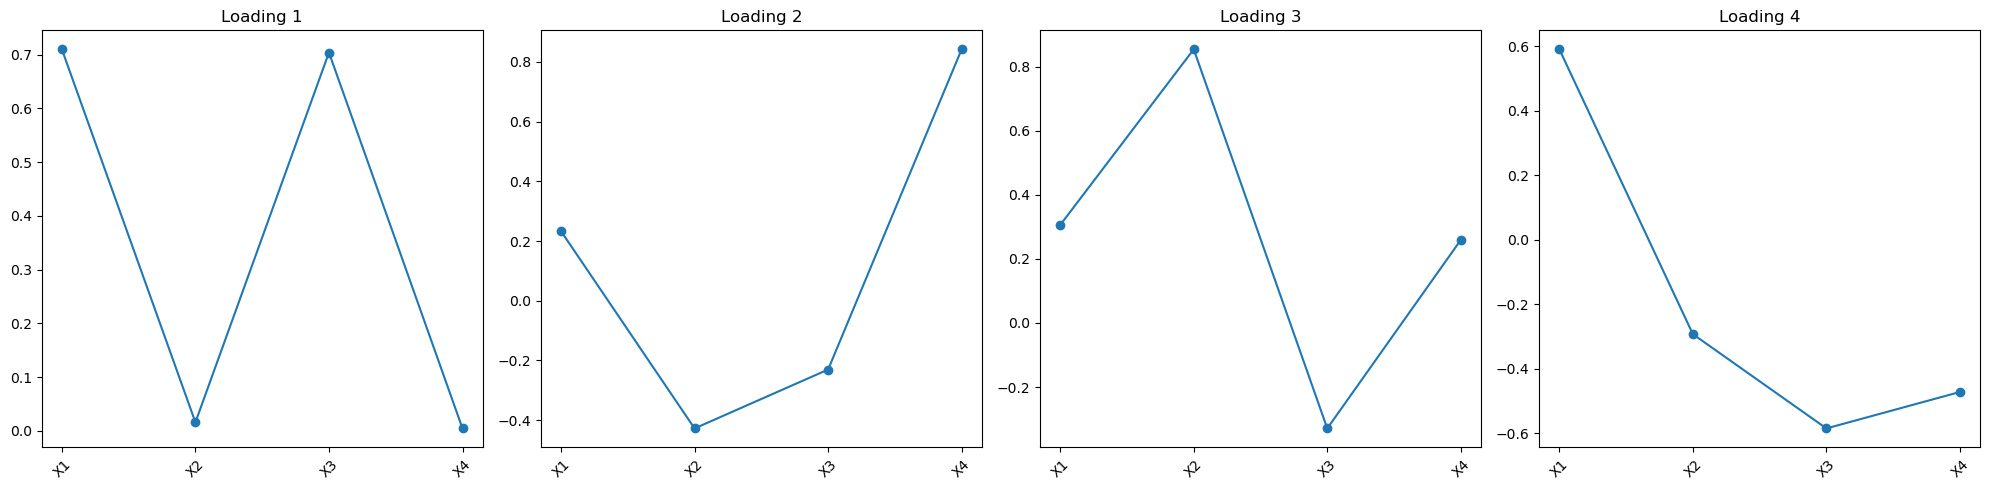

In [47]:
# Parametrize the plotting code based on the number of variables
num_components = pca_corr.components_.shape[0]

# Plot the loadings
fig, ax = plt.subplots(1, num_components, figsize=(5 * num_components, 5))

for i in range(num_components):
    ax[i].plot(pca_corr.components_[i], 'o-')
    ax[i].set_title(f'Loading {i + 1}')
    ax[i].set_xticks(range(len(phase1_data.columns)))
    ax[i].set_xticklabels(phase1_data.columns, rotation=45)

plt.tight_layout()
plt.show()

The first PC is mainly influenced by variables 1 and 3 (large positive weights), while variables 2 and 4 have a 
weight close to 0. The second PC is a contrast between variables 1 and 4 (positive weights) and variables 2 
and 3 (negative weights), and variable 4 is the one with the largest weight.

To retain at least 60% of explained variance we need to focus on the first 2 Principal Components

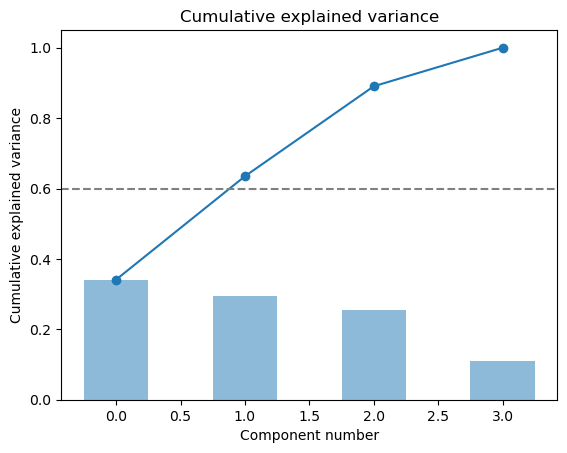

In [48]:
# Plot the cumulative explained variance
plt.plot(np.cumsum(pca_corr.explained_variance_ratio_), 'o-')
# add a bar chart to the plot
plt.bar(range(0, len(pca_corr.explained_variance_ratio_)), pca_corr.explained_variance_ratio_, width = 0.5, alpha=0.5, align='center')
plt.xlabel('Component number')
plt.ylabel('Cumulative explained variance')
plt.axhline(0.6, color='gray', linestyle='--', linewidth=1.5)
plt.title('Cumulative explained variance')
plt.show()

## c) Based on the result of point 2, design multiple univariate control charts to monitor the laser welding process with a family-wise ARL0 = 350. In case of violations of control limits, assume the existence of assignable causes.

We can design two I-MR control charts for the first 2 PCs. But, first, we need to check the assumptions. 


In [49]:
# Compute the scores
scores = pca_corr.transform(phase1_data_std)
# create a dataframe with the scores
scores_df = pd.DataFrame(scores, columns = ['PC1', 'PC2', 'PC3','PC4'])
# Print the first rows of the scores dataframe
scores_df.describe()

,PC1,PC2,PC3,PC4
count,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01
mean,-1.110223e-17,3.885781e-17,-2.498002e-17,-5.551115e-17
std,1.168427e+00,1.083852e+00,1.011071e+00,6.616475e-01
min,-2.086539e+00,-1.973367e+00,-1.623474e+00,-1.181386e+00
25%,-5.589229e-01,-4.621593e-01,-5.770981e-01,-5.215505e-01
50%,2.938894e-02,3.719825e-02,-1.317738e-01,9.008009e-02
75%,6.139185e-01,4.242361e-01,6.369972e-01,4.792099e-01
max,3.266745e+00,4.816251e+00,2.670650e+00,1.382930e+00


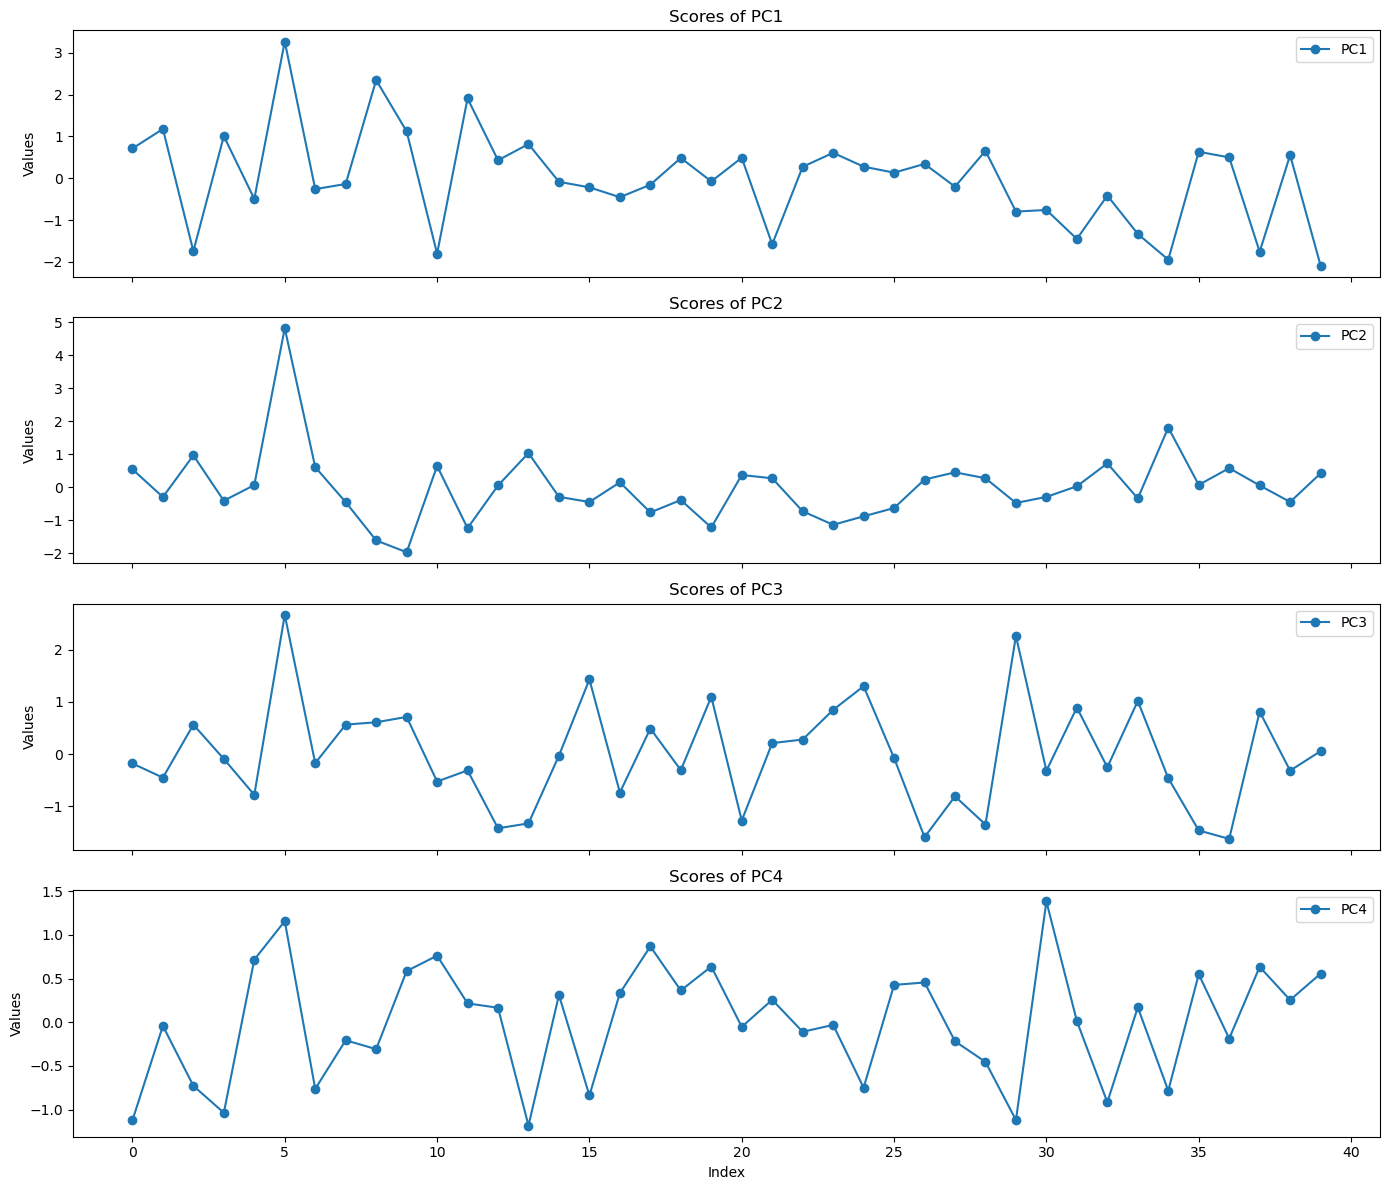

In [50]:
# Plot time series of each Xi variable on separate subplots within the same figure
fig, axs = plt.subplots(4, 1, figsize=(14, 12), sharex=True)

for i, column in enumerate(scores_df.columns):
    axs[i].plot(scores_df.index, scores_df[column],'o-', label=column)
    axs[i].set_title(f'Scores of {column}')
    axs[i].set_ylabel('Values')
    axs[i].legend()

axs[-1].set_xlabel('Index')
plt.tight_layout()
plt.show()

Runs test p-value = 0.749
The data are random (p-value >= 0.05).


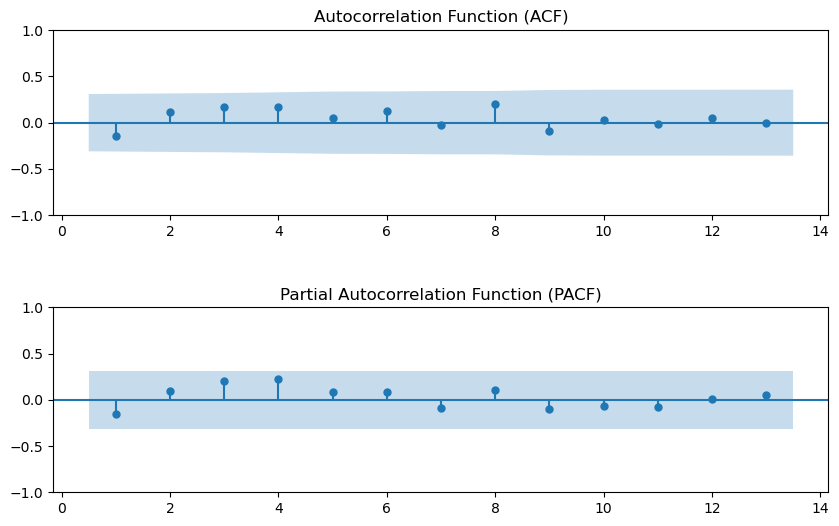

Shapiro-Wilk test p-value = 0.150
The data are normally distributed (p-value >= 0.05).


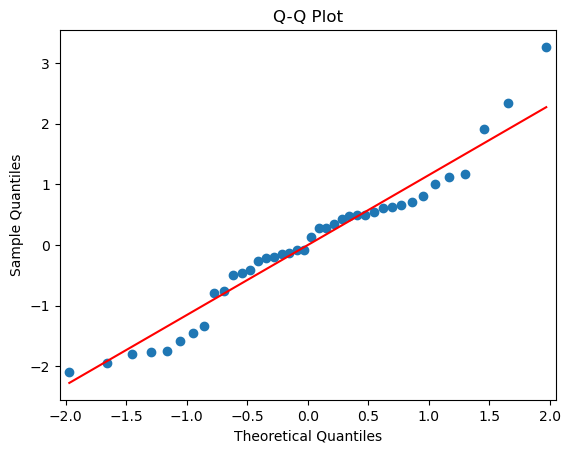

In [51]:
results = qda.runstest_acfpacf_sw(scores_df, 'PC1')

Runs test p-value = 0.987
The data are random (p-value >= 0.05).


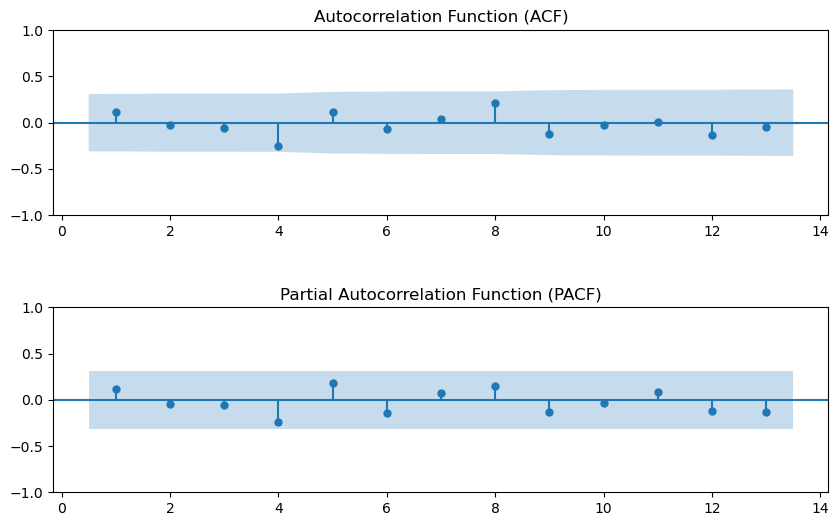

Shapiro-Wilk test p-value = 0.000
The data are not normally distributed (p-value < 0.05).


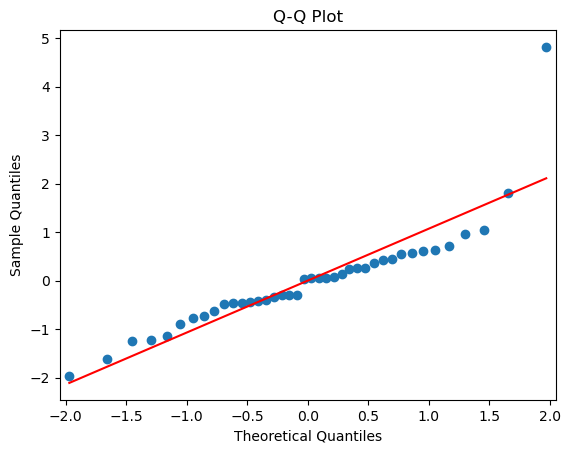

In [52]:
results = qda.runstest_acfpacf_sw(scores_df, 'PC2')

PC2 clearly shows an outlier, we should remove this observation before moving on with the CC design

In [53]:
#Identify the outlier using the IQR method
Q1 = scores_df['PC2'].quantile(0.25)
Q3 = scores_df['PC2'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier threshold
outlier_threshold = 3 * IQR

# Get the index of the outliers
outliers = scores_df[(scores_df['PC2'] < (Q1 - outlier_threshold)) | (scores_df['PC2'] > (Q3 + outlier_threshold))].index
print(f"Outliers indices: {outliers}")

# Remove the outliers from the standardized data
cleaned_data_std = phase1_data_std.drop(outliers)

Outliers indices: Int64Index([5], dtype='int64')


Explained variance ratio after removing outliers: [0.4565859  0.36683617 0.1726058  0.00397213]


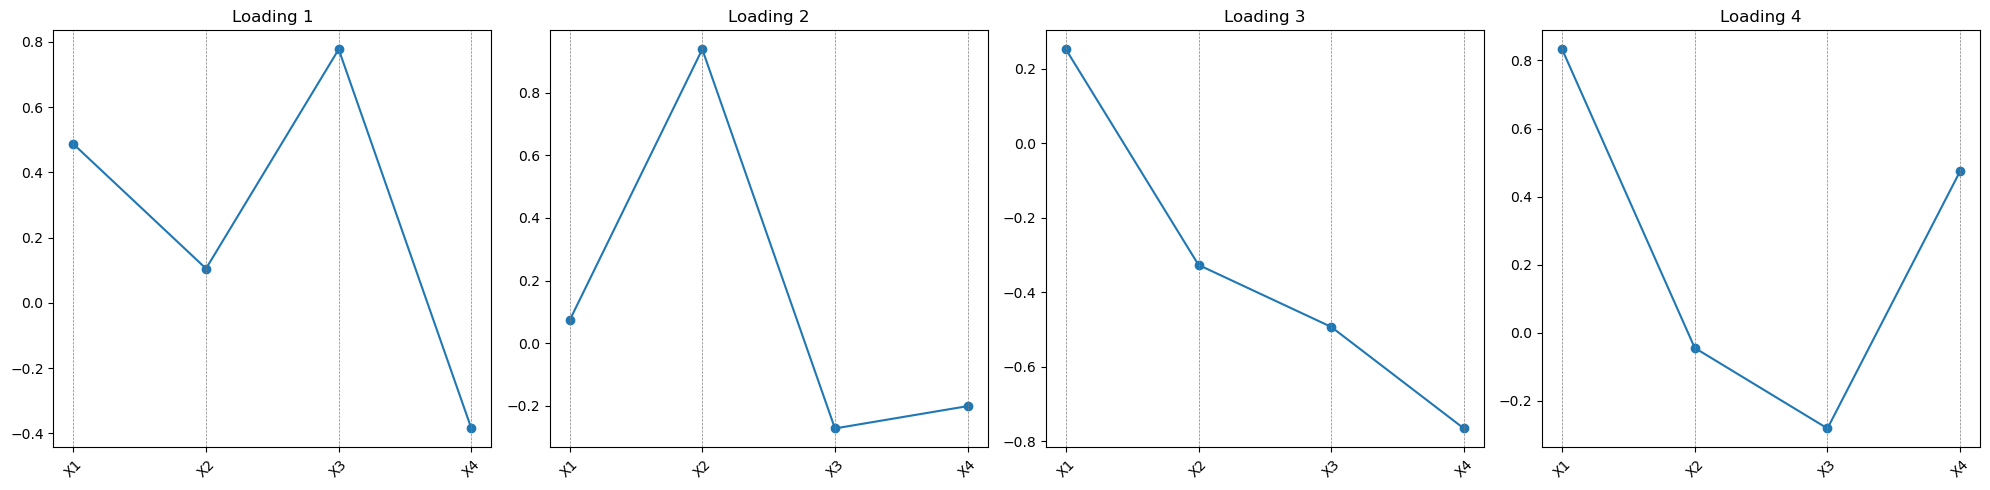

In [54]:
# Recompute PCA without the outliers
pca_cleaned = PCA()
pca_cleaned.fit(cleaned_data_std)

# Print the new explained variance ratio
explained_variance_ratio_cleaned = pca_cleaned.explained_variance_ratio_
print("Explained variance ratio after removing outliers:", explained_variance_ratio_cleaned)

# Step 8: Plot the new loadings
num_components = pca_cleaned.components_.shape[0]

fig, ax = plt.subplots(1, num_components, figsize=(5 * num_components, 5))

for i in range(num_components):
    ax[i].plot(pca_cleaned.components_[i], 'o-')
    ax[i].set_title(f'Loading {i + 1}')
    ax[i].set_xticks(range(len(cleaned_data_std.columns)))
    ax[i].set_xticklabels(cleaned_data_std.columns, rotation=45)
    for j in range(len(cleaned_data_std.columns)):
        ax[i].axvline(x=j, color='gray', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

In [56]:
# Compute the scores
scores_cleaned = pca_cleaned.transform(cleaned_data_std)
# create a dataframe with the scores
scores_df_cleaned = pd.DataFrame(scores_cleaned, columns = ['PC1', 'PC2', 'PC3','PC4'])
# Print the first rows of the scores dataframe
scores_df_cleaned.describe()

,PC1,PC2,PC3,PC4
count,3.900000e+01,3.900000e+01,3.900000e+01,3.900000e+01
mean,-2.277381e-17,2.135044e-18,3.985416e-17,6.760974e-18
std,1.163019e+00,1.042466e+00,7.150779e-01,1.084769e-01
min,-2.441816e+00,-1.791455e+00,-1.312138e+00,-2.217334e-01
25%,-5.730571e-01,-6.441949e-01,-5.609093e-01,-6.933674e-02
50%,3.379399e-01,-1.336872e-02,2.508946e-03,-3.908523e-03
75%,5.949924e-01,8.640437e-01,5.734015e-01,6.323087e-02
max,2.742794e+00,2.252387e+00,1.500125e+00,2.308267e-01


Runs test p-value = 0.530
The data are random (p-value >= 0.05).


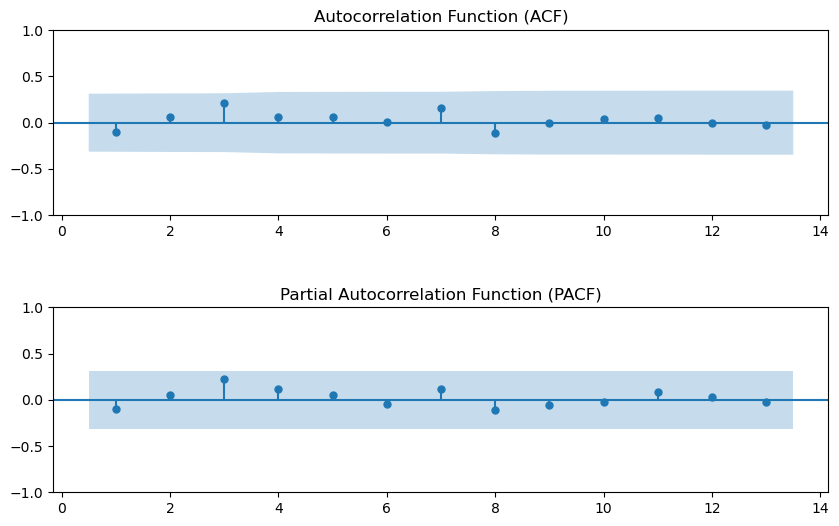

Shapiro-Wilk test p-value = 0.243
The data are normally distributed (p-value >= 0.05).


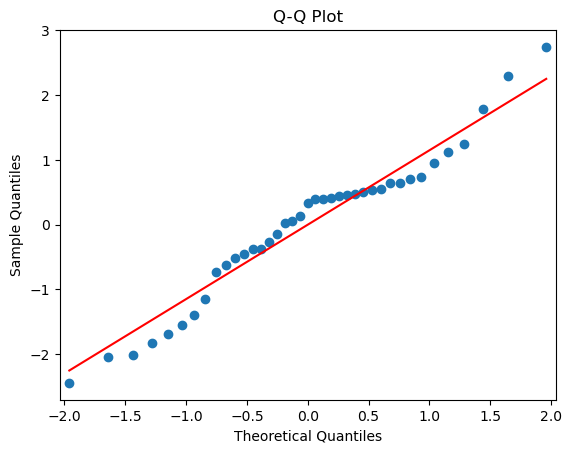

In [57]:
results = qda.runstest_acfpacf_sw(scores_df_cleaned, 'PC1')

Runs test p-value = 0.254
The data are random (p-value >= 0.05).


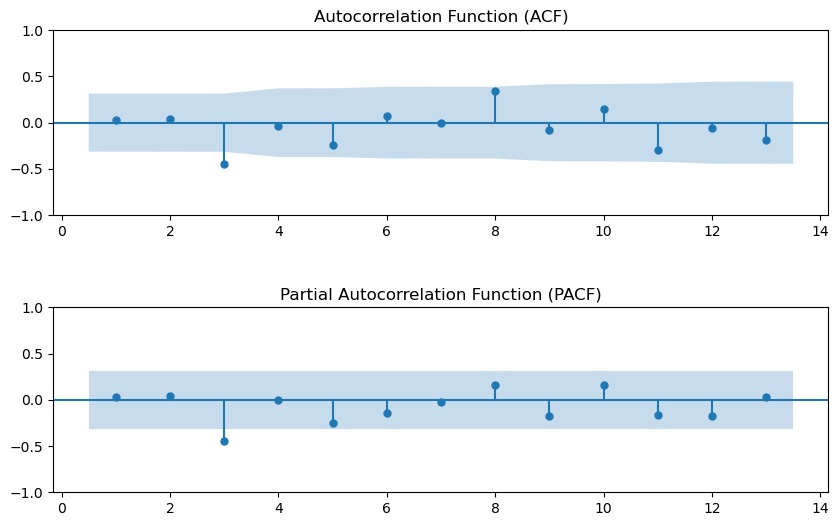

Shapiro-Wilk test p-value = 0.459
The data are normally distributed (p-value >= 0.05).


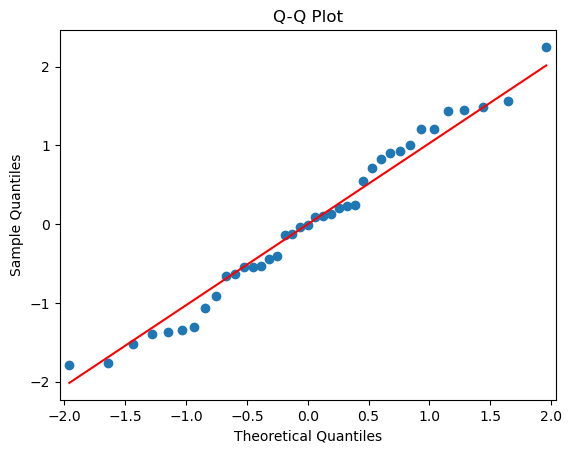

In [58]:
results = qda.runstest_acfpacf_sw(scores_df_cleaned, 'PC2')

We have fixed the assumptions on the considered PCs

Let's apply the family-wise correction to find K (Bonferroni Correction)

In [59]:
# Given information
ARL0 = 350
m = 2  # number of hypothesis tests

# Calculate the overall significance level
alpha = 1 / ARL0

# Apply the Bonferroni correction
alpha_adjusted = alpha / m

# Determine the critical value k for a two-sided test
k = stats.norm.ppf(1 - alpha_adjusted / 2)

print(f"The critical value k is: {k}")

The critical value k is: 3.188815258638476


Now let's build the two I-MR Control Charts

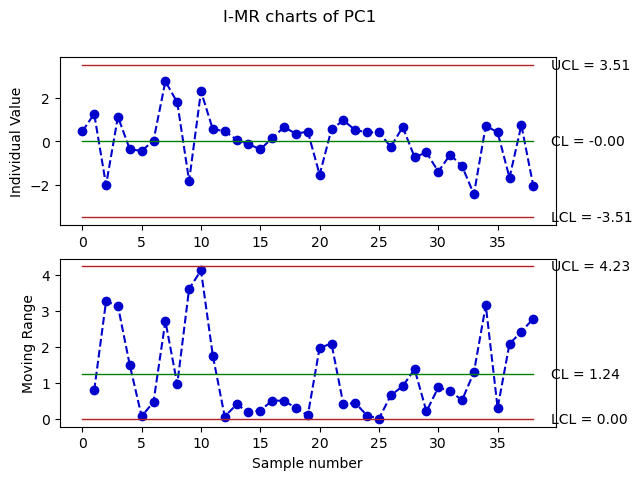

In [60]:
data_IMR = qda.ControlCharts.IMR(scores_df_cleaned,'PC1',k)

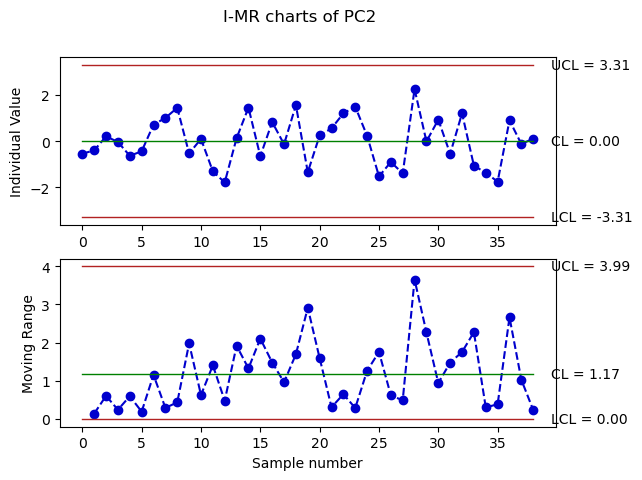

In [61]:
data_IMR = qda.ControlCharts.IMR(scores_df_cleaned,'PC2',k)

No violation are present, the design of the Control Charts is over and we can move to Phase 2